In [455]:
import pandas as pd
import numpy as np
import seaborn as sns

In [456]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from collections import Counter

In [457]:
#Importando dataset
DATASET_PATH = "/Users/matias/Documents/Posgrado/mis_trabajos/posgrado_ia/AMq1/tp_final/data_playlist.csv"
# DATASET_PATH = "/content/sample_data/data_playlist.csv"
df = pd.read_csv(DATASET_PATH, delimiter=',')

In [458]:
#from google.colab import drive
#  drive.mount('/content/drive')

In [459]:
df.head(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [460]:
df.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


Analizamos el tipo de variables

In [461]:
df.dtypes

acousticness        float64
danceability        float64
duration              int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
label                 int64
dtype: object

Analizamos si tenemos datos nulos

In [462]:
df.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

Analizamos correlaciones entre las variables

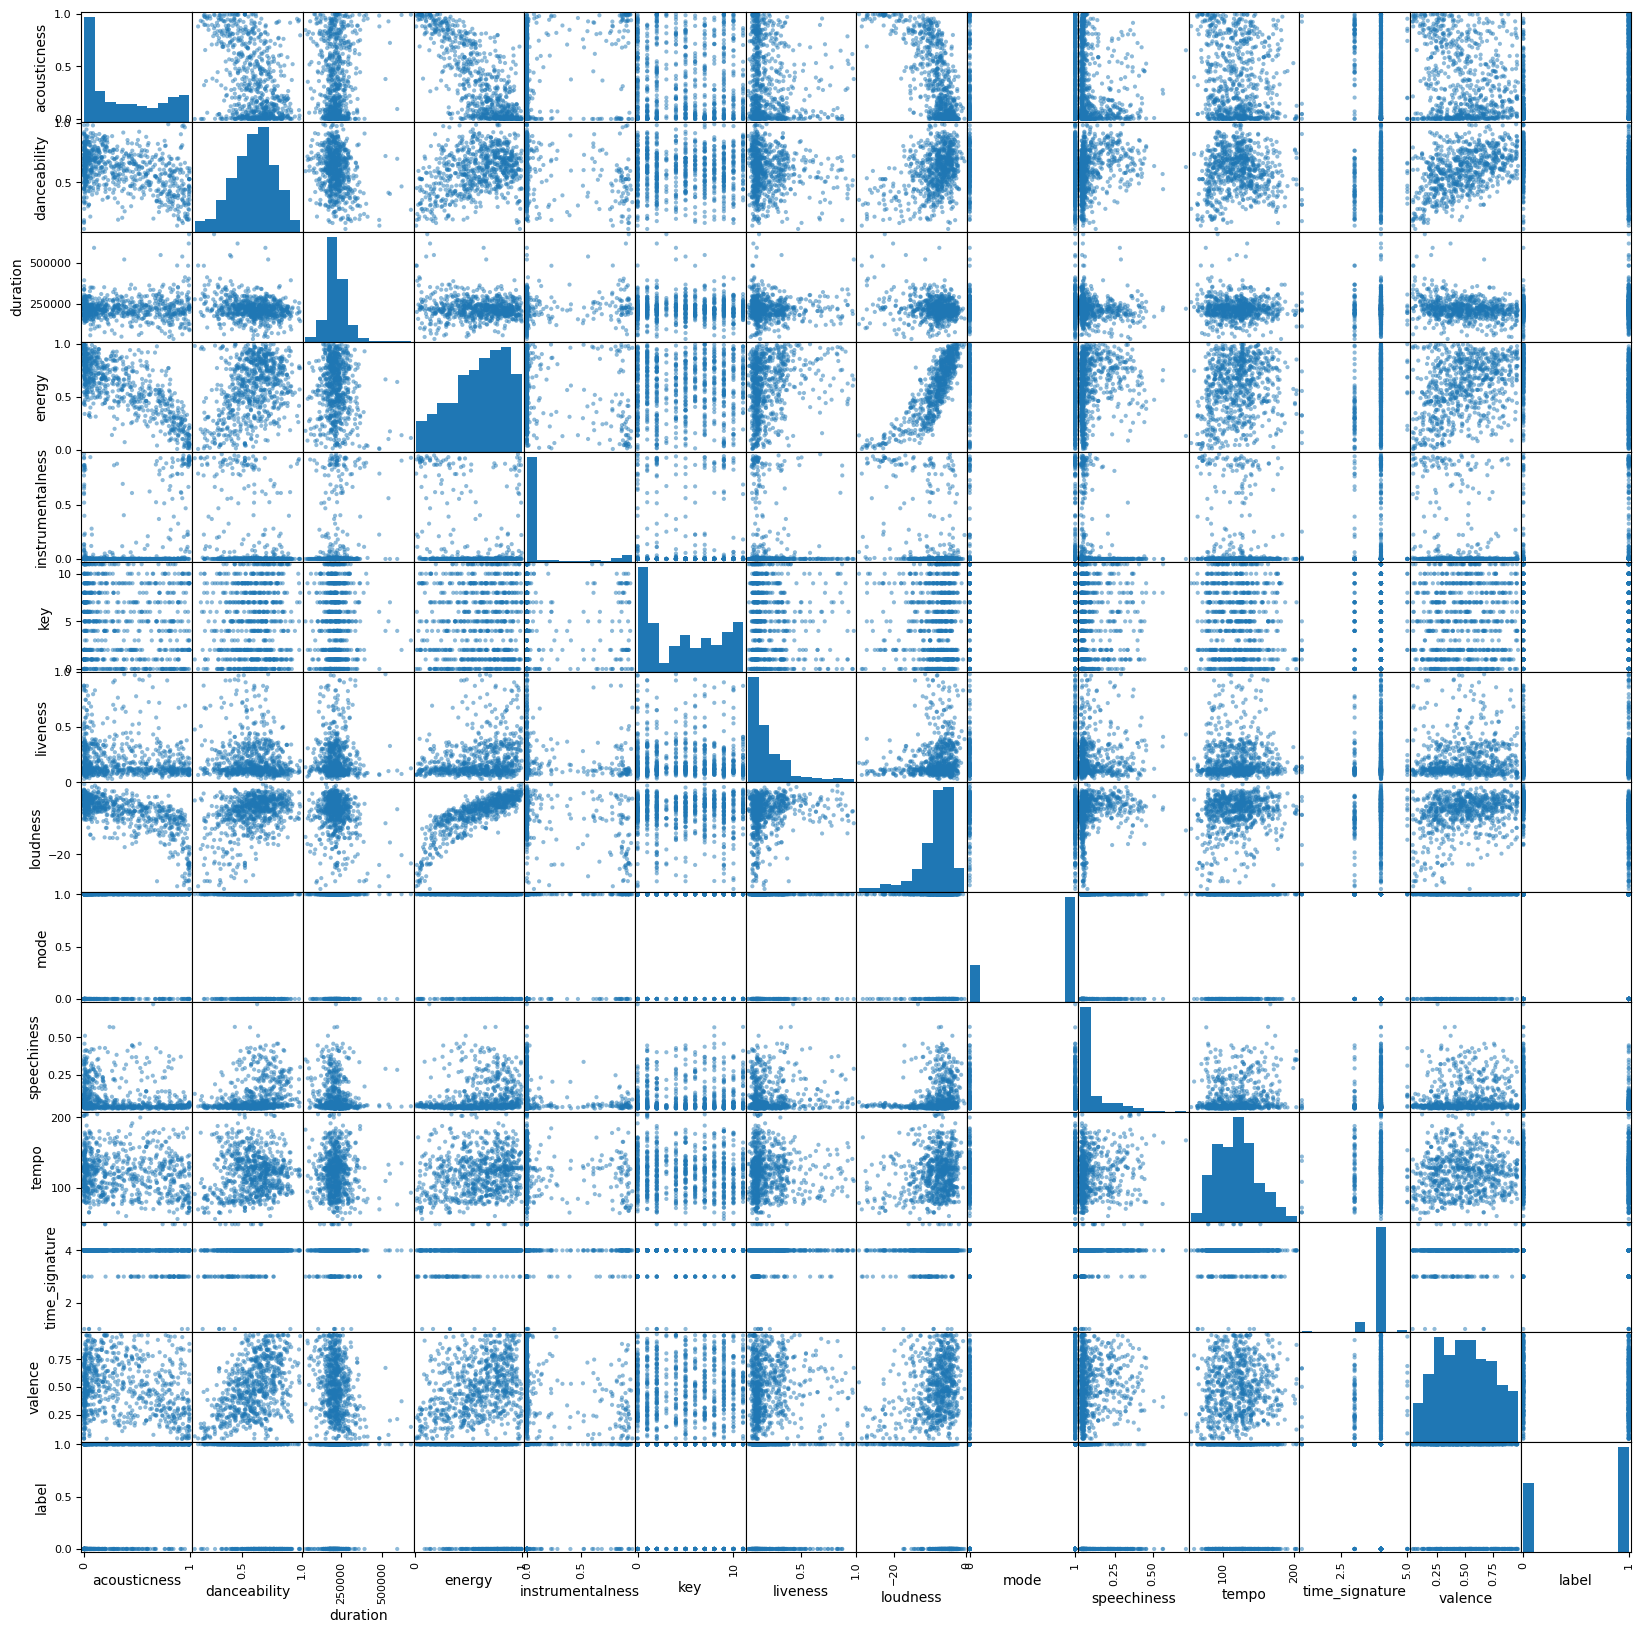

In [463]:
sm = pd.plotting.scatter_matrix(df, figsize=(20, 20))

In [464]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

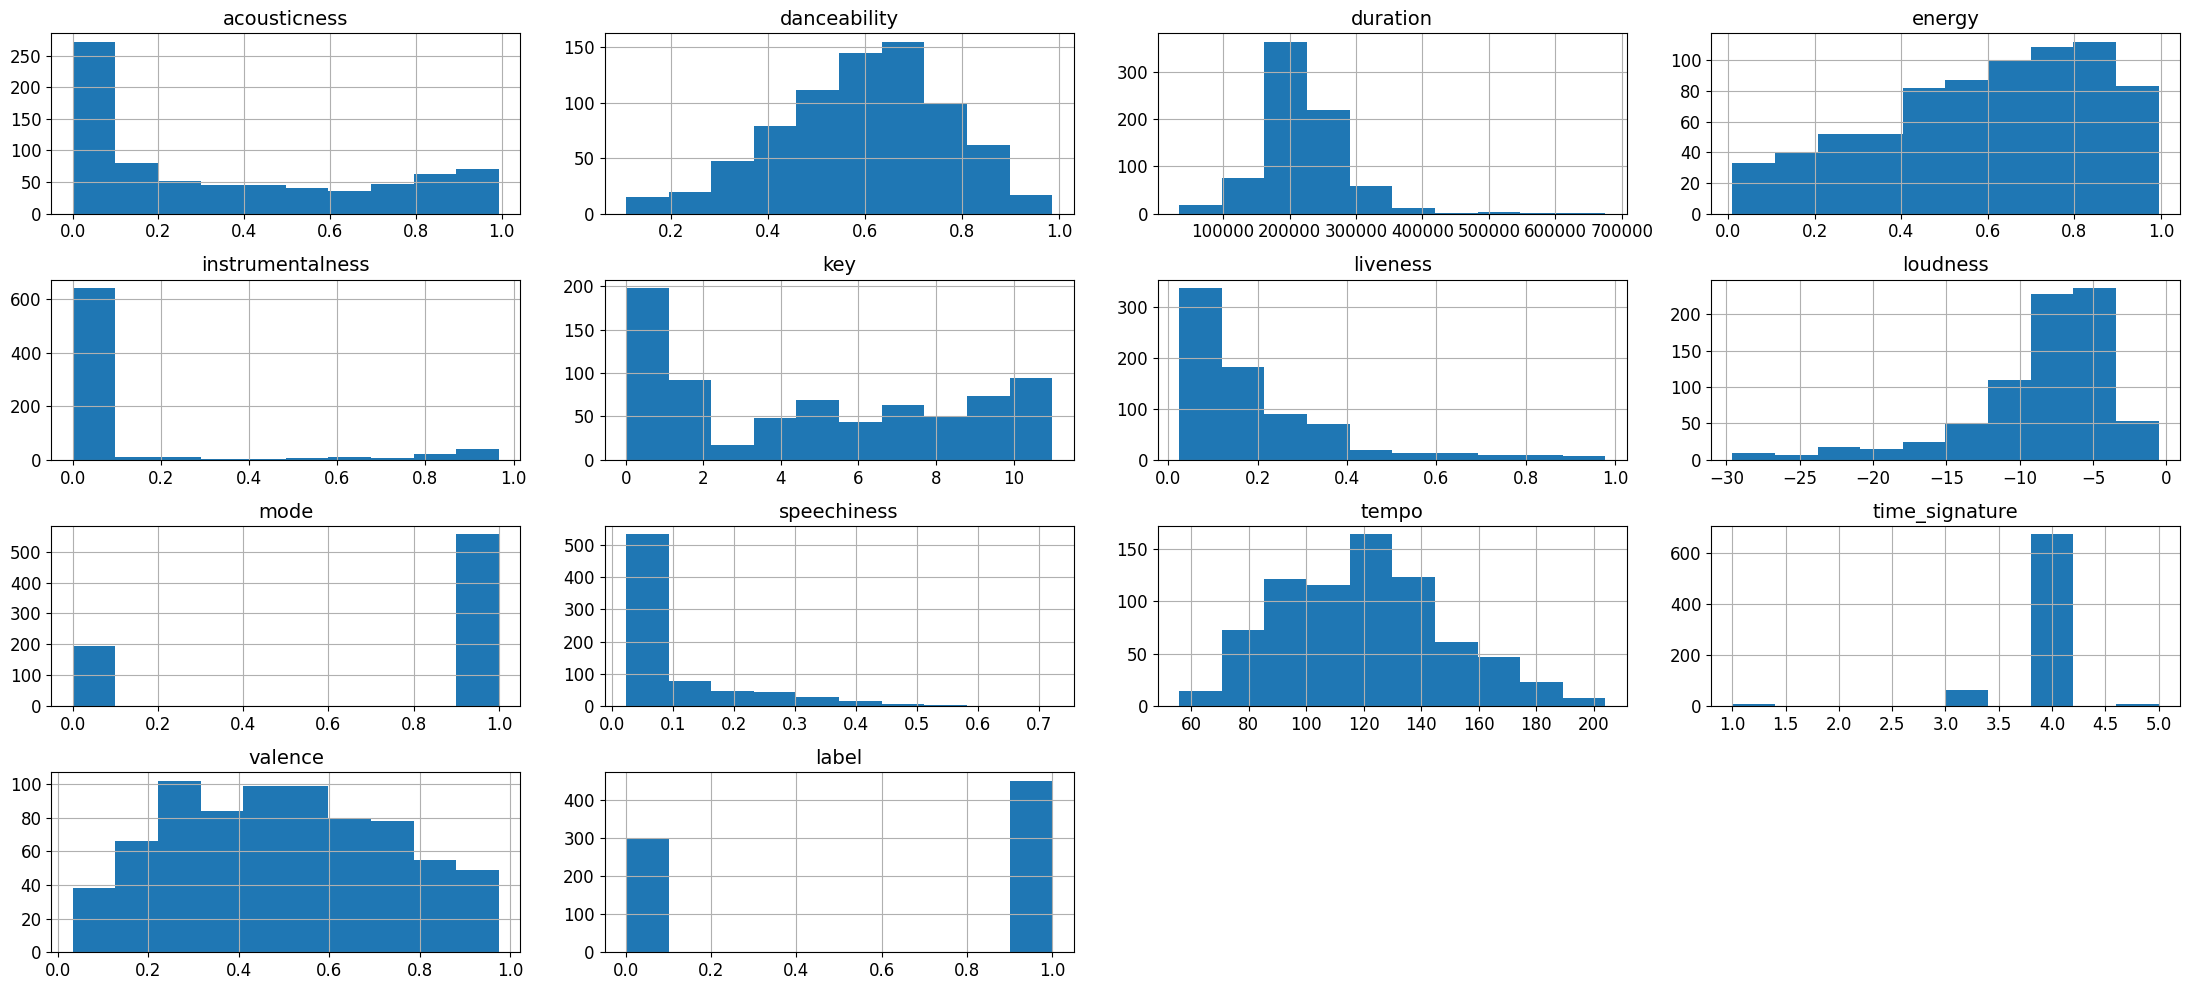

In [465]:
display_dataset_distributions(df)

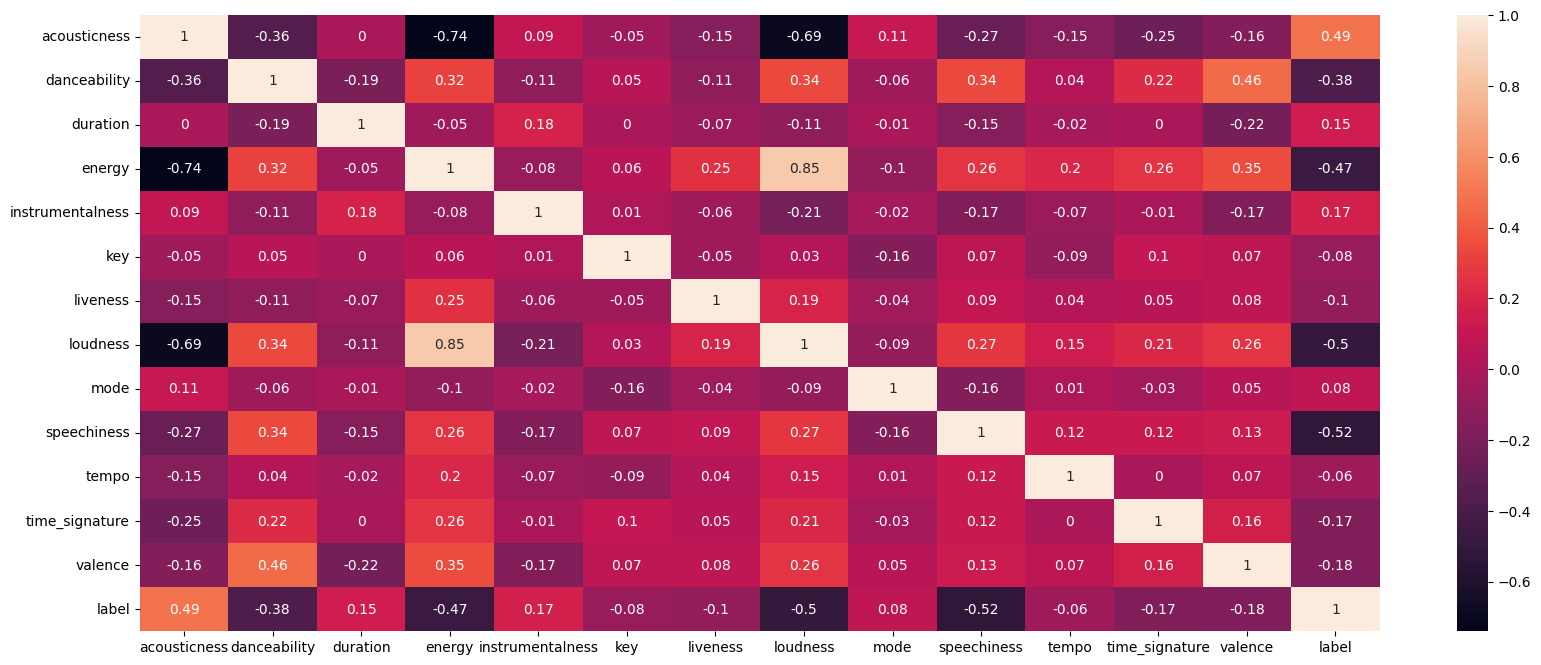

In [466]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = df[df.columns].corr(method = 'spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

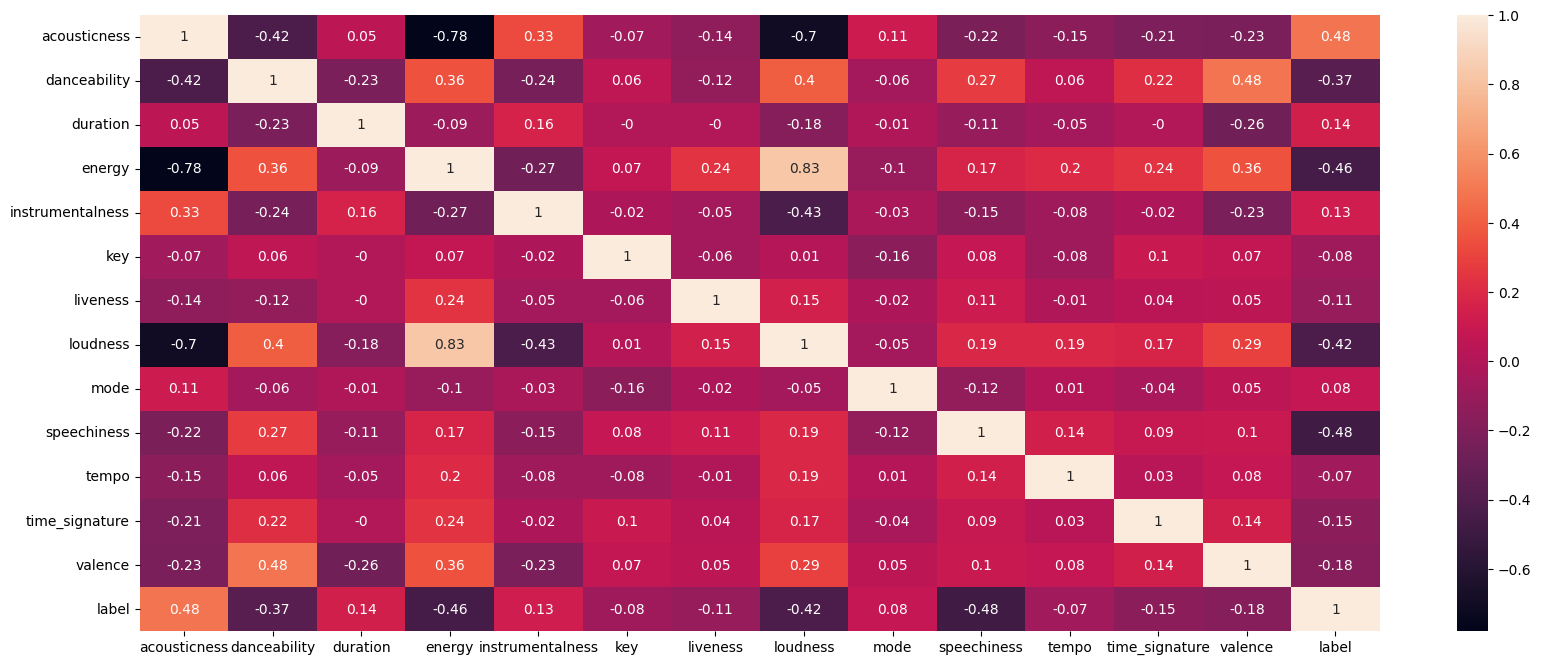

In [467]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = df[df.columns].corr(method = 'pearson').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

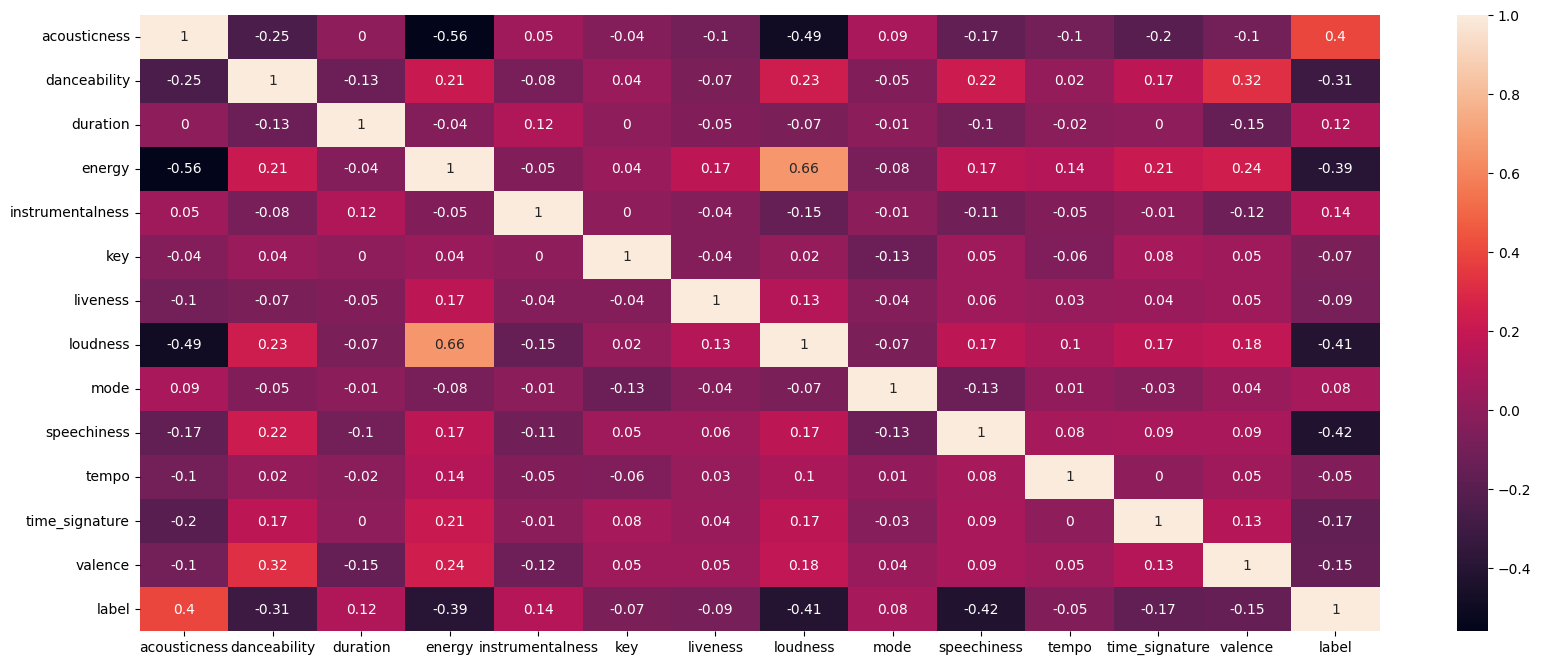

In [468]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = df[df.columns].corr(method = 'kendall').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

analizamos si identificamos features que son catetegoricos a simple vista

In [469]:
for r in df.columns:    
    l = np.array(df[r].values)
    print('column:',r,'rows:',len(df[r]),'y clases: ',len(np.unique(l)))

column: acousticness rows: 750 y clases:  596
column: danceability rows: 750 y clases:  458
column: duration rows: 750 y clases:  717
column: energy rows: 750 y clases:  502
column: instrumentalness rows: 750 y clases:  431
column: key rows: 750 y clases:  12
column: liveness rows: 750 y clases:  445
column: loudness rows: 750 y clases:  710
column: mode rows: 750 y clases:  2
column: speechiness rows: 750 y clases:  457
column: tempo rows: 750 y clases:  729
column: time_signature rows: 750 y clases:  4
column: valence rows: 750 y clases:  487
column: label rows: 750 y clases:  2


identificamos a simple vista 3 variables categoricas

Ademas: creamos mapping para TEMPO, para transformarlo en categorica y mappeamos a binarios

In [470]:
tempo_mappings = {
    (40,60)   : '000', #'lento',
    (60,66)   : '001', #'Larghetto',
    (66,76)   : '010', #'Adagio',
    (76,108)  : '011', #'Andante',
    (108,120) : '100', #'Moderato',
    (120,168) : '101', #'Allegro',
    (168,200) : '110', #'Presto',
    (200,216) : '111', #'Prestissimo',
                }


def map_tempos(x):
    for key in tempo_mappings:
        if x >= key[0] and x <= key[1]:
            return tempo_mappings[key]

df['tempo'] = df['tempo'].apply(map_tempos)

df.head(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,100,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,101,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,101,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,100,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,011,4,0.288,1


Ahora, intentaremos categorizar las columnas 'liveness' y 'instrumentalness' para analizar nuevamente las metricas. Para ello nos valemos de los graficos en histogramas y luego un plot para elegir una region a partir tomaremos como instrumentalness 1 o 0 

<AxesSubplot: >

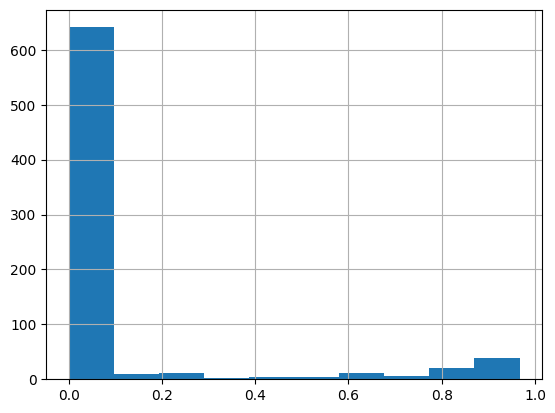

In [471]:
df.instrumentalness.hist(bins=10)

In [472]:
#Todos los valores menores a 0.8 seran considerados 0 y 1 caso contrario
df['instrumentalness'] = df['instrumentalness'].apply(lambda d: 1 if d>0.8 else 0)
df.head(5)


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,1,8,0.1120,-14.835,0,0.0444,100,4,0.143,1
1,0.192,0.714,207019,0.614,0,4,0.2630,-6.935,1,0.0319,101,4,0.582,1
2,0.333,0.630,216200,0.455,0,5,0.1270,-9.290,1,0.0292,101,4,0.199,1
3,0.601,0.810,136413,0.221,0,5,0.1840,-11.005,1,0.0429,100,4,0.798,1
4,0.883,0.465,181440,0.459,0,6,0.0692,-8.137,0,0.0351,011,4,0.288,1


Hacemos el mismo analisis para liveness

<AxesSubplot: >

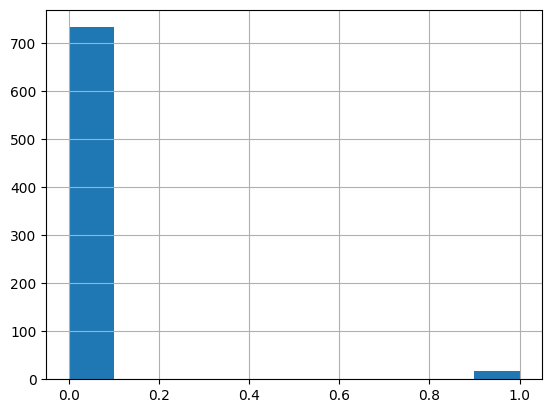

In [490]:
df.liveness.hist(bins=10)

In [474]:
df['liveness'] = df['liveness'].apply(lambda d: 1 if d>0.8 else 0)
df.head(5)

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,1,8,0,-14.835,0,0.0444,100,4,0.143,1
1,0.192,0.714,207019,0.614,0,4,0,-6.935,1,0.0319,101,4,0.582,1
2,0.333,0.630,216200,0.455,0,5,0,-9.290,1,0.0292,101,4,0.199,1
3,0.601,0.810,136413,0.221,0,5,0,-11.005,1,0.0429,100,4,0.798,1
4,0.883,0.465,181440,0.459,0,6,0,-8.137,0,0.0351,011,4,0.288,1


Analizamos si el dataset esta balanceado

In [475]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])

getLabelCount(df,'label')

[(0, 298), (1, 452)]

In [476]:
X = df.drop(['label'],axis = 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=2022)

In [477]:
# Aplicamos SMOTE

In [478]:
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 412, 0: 412})
Testing target statistics: Counter({1: 40, 0: 35})


,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.8050,0.331,210040,0.357,0,0,0,-7.866,0,0.1020,110.0,3,0.235
1,0.0173,0.480,214707,0.855,0,7,0,-5.579,1,0.0377,101.0,4,0.795
2,0.7210,0.562,271573,0.439,0,3,0,-9.969,1,0.4010,101.0,4,0.588
3,0.8020,0.657,132000,0.560,0,4,0,-7.934,1,0.3760,100.0,4,0.180
4,0.0749,0.686,240080,0.567,0,9,0,-10.993,1,0.0278,11.0,4,0.643


# Aplicamos PyCaret para ver el modelo que mejor se ajustaria

In [479]:
## ------ ESTO ESTA HECHO EN EL FILE DE COLAB

In [480]:
clf = RandomForestClassifier(max_depth=10, random_state=2022)
clf.fit(X_res, y_res)

RandomForestClassifier(max_depth=10, random_state=2022)

In [481]:
y_pred = clf.predict(X_test)



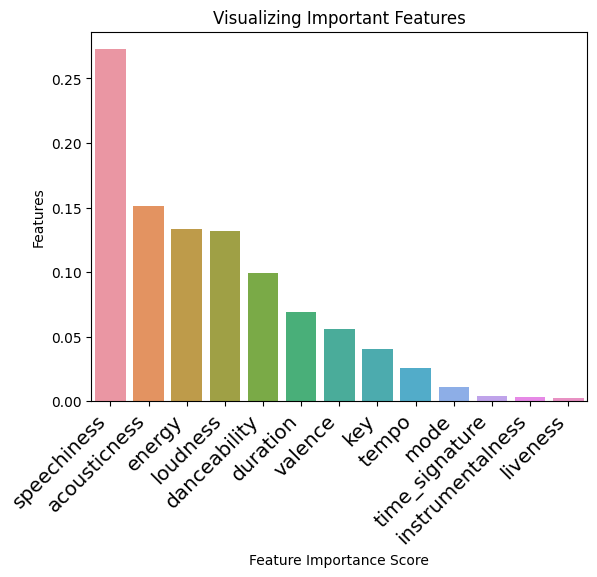

In [487]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": clf.feature_importances_}
).sort_values("importance", ascending=False)

# visualizarcaracterísticas importantes
# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [482]:
print('score',clf.score(X_test , y_test))
print('macro recall',recall_score(y_test, y_pred, average='macro'))
print('micro recall',recall_score(y_test, y_pred, average='micro'))
print('weighted recall',recall_score(y_test, y_pred, average='weighted'))

score 0.8533333333333334
macro recall 0.8500000000000001
micro recall 0.8533333333333334
weighted recall 0.8533333333333334


In [483]:
# df2 = X_res  
# y_res_frame = y_res.to_frame()
# df2['label'] =  y_res_frame['label']
# df2.head()

In [484]:
#df2.to_csv(DATASET_PATH+"/data_playlist_pre-processed.csv", encoding='utf-8')
# df2.to_csv("/content/sample_data/data_playlist_pre-processed.csv", encoding='utf-8')



# Grid Search de Hiperparámetros



In [485]:

## cambiar los valores del range para ver diferencias en score

for search_depth in range(1,50,1):
  clf_grid_search = RandomForestClassifier(max_depth=search_depth, random_state=2022)
  clf_grid_search.fit(X_res, y_res)
  y_pred = clf_grid_search.predict(X_test)
  print('score con',search_depth,'nodos->',clf_grid_search.score(X_test , y_test))


score con 1 nodos-> 0.76
score con 2 nodos-> 0.7733333333333333
score con 3 nodos-> 0.8266666666666667
score con 4 nodos-> 0.84
score con 5 nodos-> 0.84
score con 6 nodos-> 0.8533333333333334
score con 7 nodos-> 0.84
score con 8 nodos-> 0.84
score con 9 nodos-> 0.84
score con 10 nodos-> 0.8533333333333334
score con 11 nodos-> 0.84
score con 12 nodos-> 0.8533333333333334
score con 13 nodos-> 0.8266666666666667
score con 14 nodos-> 0.8266666666666667
score con 15 nodos-> 0.8266666666666667
score con 16 nodos-> 0.8266666666666667
score con 17 nodos-> 0.8266666666666667
score con 18 nodos-> 0.8266666666666667
score con 19 nodos-> 0.8266666666666667
score con 20 nodos-> 0.8266666666666667
score con 21 nodos-> 0.8266666666666667
score con 22 nodos-> 0.8266666666666667
score con 23 nodos-> 0.8266666666666667
score con 24 nodos-> 0.8266666666666667
score con 25 nodos-> 0.8266666666666667
score con 26 nodos-> 0.8266666666666667
score con 27 nodos-> 0.8266666666666667
score con 28 nodos-> 0.8266